In [533]:
# Program used to analyze data for final project of Introduction to research methods
# Title project: The influence of politically oriented social media engagement on young Dutch enthousiasts
# s3394328 - Sander Beyen

import numpy as np 
import pandas as pd # For data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns # For visualization

In [534]:
# Imports the csv file
df = pd.read_csv("Data.csv", delimiter=';')

# Survey questions and data format

In [562]:
# Example of the data format:
# Respondent #3 is a 26 year old man whose political activity has decreased because 
# of the rise of political engagement on social media.
# He rarely encounters politically loaded information on his timeline
# but does come across it on a daily basis on traditional media platforms. 
# This person considers the quality of online information to be worse and is very worried about the state of 
# political engagement on social media. As a result of this he has become more critical of the information he takes in
# and has also decided to make less use of social media platforms.
df.head(n=5)

ID  Age  Gender Political activity PI on timeline PI on TM Quality online  \
0   1   18    male           decrease          daily    never         better   
1   2   22  female           increase          daily    daily          equal   
2   3   26    male           decrease         seldom    daily          worse   
3   4   21  female          no impact          daily   seldom         better   
4   5   21    male           increase          daily   seldom          equal   

      Worried Attitude change Behavioural change  
0  not at all  less criticial               none  
1      hardly   more critical    use differently  
2        very   more critical           use less  
3  not at all            none               none  
4      hardly   more critical    use differently

In [563]:
# Checks the amount of entries for all categories 
# All classes are complete.
df.count()

ID                    107
Age                   107
Gender                107
Political activity    107
PI on timeline        107
PI on TM              107
Quality online        107
Worried               107
Attitude change       107
Behavioural change    107
dtype: int64

# Question 1: Age distribution

In [560]:
# Q1: Average age of respondents
df["Age"].mean()

20.102803738317757

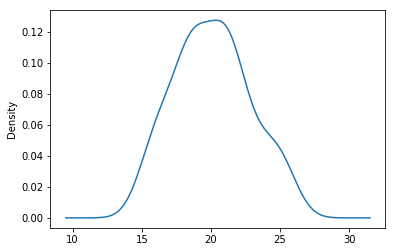

In [561]:
# Q1: Plot of the age distribution
df.Age.plot(kind='kde')

# Question 2: Gender distribution

In [564]:
# Q2: Gender distribution
pd.value_counts(df['Gender'])

male      62
female    40
n-b        5
Name: Gender, dtype: int64

In [565]:
# Q2: Relative gender distribution
df.Gender.value_counts(normalize=True)

male      0.579439
female    0.373832
n-b       0.046729
Name: Gender, dtype: float64

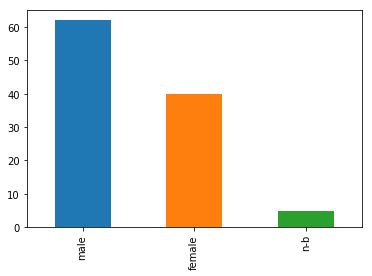

In [566]:
# Q2: Plot of gender distribution
pd.value_counts(df['Gender']).plot.bar()

# Question 3: Impact on political activity

In [555]:
# Q3: Impact on political activity (absolute frequency)
pd.value_counts(df['Political activity'])

increase     63
no impact    25
decrease     19
Name: Political activity, dtype: int64

In [556]:
# Q3: Impact on political activity (relative frequency)
df['Political activity'].value_counts(normalize=True)

increase     0.588785
no impact    0.233645
decrease     0.177570
Name: Political activity, dtype: float64

In [557]:
# Q3: cross-reference of political activity with gender (for dependent variable)
df.groupby(['Political activity', 'Gender']).size()

Political activity  Gender
decrease            female     8
                    male      11
increase            female    26
                    male      34
                    n-b        3
no impact           female     6
                    male      17
                    n-b        2
dtype: int64

In [559]:
# Q3: cross-tab of political activity frequency with gender
pd.crosstab(df['Political activity'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

Gender                female      male       n-b
Political activity                              
decrease            0.421053  0.578947  0.000000
increase            0.412698  0.539683  0.047619
no impact           0.240000  0.680000  0.080000

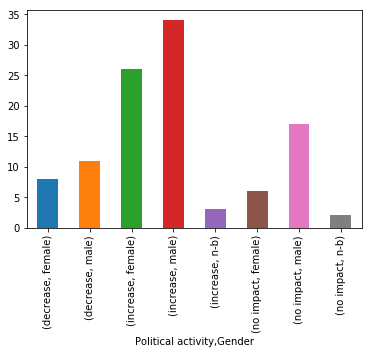

In [567]:
# Q3: plot of cross-reference political activity frequency with gender (absolute frequency)
df.groupby(['Political activity', 'Gender']).size().plot.bar()

# Question 4: Frequency politically oriented information on timeline.

In [542]:
# Q4: Political information on timeline (absolute frequency)
pd.value_counts(df['PI on timeline'])

daily     79
seldom    20
never      8
Name: PI on timeline, dtype: int64

In [543]:
# Q4: Political information on timeline (relative frequency)
df['PI on timeline'].value_counts(normalize=True)

daily     0.738318
seldom    0.186916
never     0.074766
Name: PI on timeline, dtype: float64

In [544]:
# Q4: cross-reference of political information on timeline with gender 
df.groupby(['PI on timeline', 'Gender']).size()

PI on timeline  Gender
daily           female    30
                male      44
                n-b        5
never           female     3
                male       5
seldom          female     7
                male      13
dtype: int64

In [569]:
# Q4: cross-tab of political information on timeline with gender
pd.crosstab(df['PI on timeline'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

Gender            female      male       n-b
PI on timeline                              
daily           0.379747  0.556962  0.063291
never           0.375000  0.625000  0.000000
seldom          0.350000  0.650000  0.000000

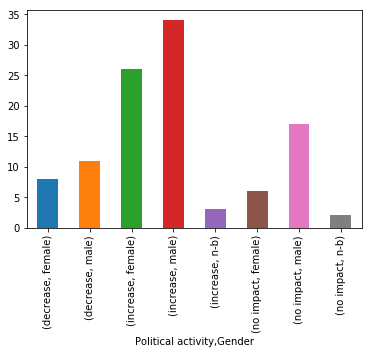

In [570]:
# Q4: plot of cross-reference political information on timeline with gender (absolute frequency)
df.groupby(['Political activity', 'Gender']).size().plot.bar()

# Question 5: Frequency politically oriented content on traditional media 

In [546]:
# Q5: Political information on traditional media outlets (absolute frequency)
pd.value_counts(df['PI on TM'])

daily     54
seldom    38
never     15
Name: PI on TM, dtype: int64

In [547]:
# Q5: Political information on traditional media outlets (relative frequency)
df['PI on TM'].value_counts(normalize=True)

daily     0.504673
seldom    0.355140
never     0.140187
Name: PI on TM, dtype: float64

In [548]:
# Q5: cross-reference of political information on traditional media outlets with gender 
df.groupby(['PI on TM', 'Gender']).size()

PI on TM  Gender
daily     female    20
          male      30
          n-b        4
never     female     6
          male       8
          n-b        1
seldom    female    14
          male      24
dtype: int64

In [571]:
# Q5: cross-tab of political information on traditional media outlets with gender
pd.crosstab(df['PI on TM'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

Gender      female      male       n-b
PI on TM                              
daily     0.370370  0.555556  0.074074
never     0.400000  0.533333  0.066667
seldom    0.368421  0.631579  0.000000

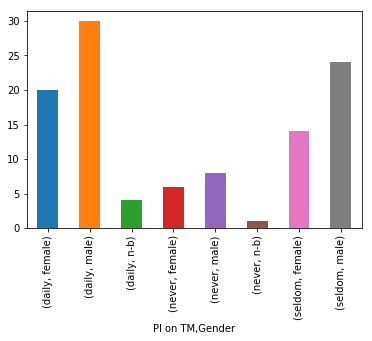

In [592]:
# Q4: plot of cross-reference political information on traditional media outlets with gender (absolute frequency)
df.groupby(['PI on TM', 'Gender']).size().plot.bar()

# Question 6: Assessment of quality of online information compared to traditional media

In [550]:
# Q6: Assessment of quality of online information compared to traditional media (absolute frequency)
pd.value_counts(df['Quality online'])

better    55
worse     28
equal     24
Name: Quality online, dtype: int64

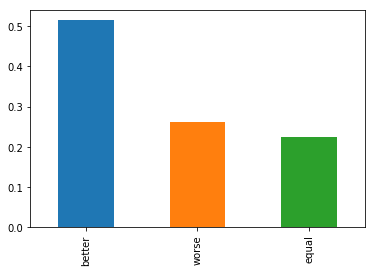

In [596]:
# Q6: Assessment of quality of online information compared to traditional media (relative frequency)
df['Quality online'].value_counts(normalize=True).plot.bar()

In [552]:
# Q6: cross-reference of assessment of online information quality compared to traditional media with gender (absolute frequency)
df.groupby(['Quality online', 'Gender']).size()

Quality online  Gender
better          female    20
                male      33
                n-b        2
equal           female    10
                male      14
worse           female    10
                male      15
                n-b        3
dtype: int64

In [573]:
# Q6: cross-tab of assessment of online information quality compared to traditional media with gender
pd.crosstab(df['Quality online'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

Gender            female      male       n-b
Quality online                              
better          0.363636  0.600000  0.036364
equal           0.416667  0.583333  0.000000
worse           0.357143  0.535714  0.107143

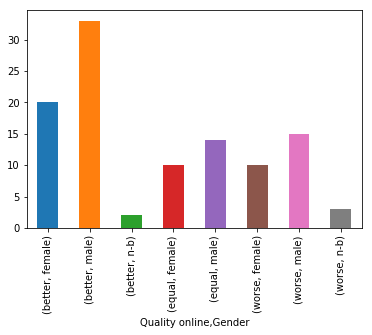

In [553]:
# Q6: plot of cross-reference of assessment of online information quality with gender (absolute frequency)
df.groupby(['Quality online', 'Gender']).size().plot.bar()

# Question 7: Assessment state of worry political engagement on social media

In [574]:
# Q7: Assessment state of worry regarding political engagement on social media (absolute frequency)
pd.value_counts(df['Worried'])

hardly        41
very          40
not at all    26
Name: Worried, dtype: int64

In [575]:
# Q7: Assessment state of worry regarding political engagement on social media (relative frequency)
df['Worried'].value_counts(normalize=True)

hardly        0.383178
very          0.373832
not at all    0.242991
Name: Worried, dtype: float64

In [576]:
# Q7: Cross-reference of assessment state of worry regarding political engagement on social media with gender
df.groupby(['Worried', 'Gender']).size()

Quality online  Gender
better          female    20
                male      33
                n-b        2
equal           female    10
                male      14
worse           female    10
                male      15
                n-b        3
dtype: int64

In [578]:
# Q7: Cross-reference assessment state of worry regarding political engagement on social media with gender
pd.crosstab(df['Worried'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

Gender        female      male       n-b
Worried                                 
hardly      0.243902  0.658537  0.097561
not at all  0.346154  0.653846  0.000000
very        0.525000  0.450000  0.025000

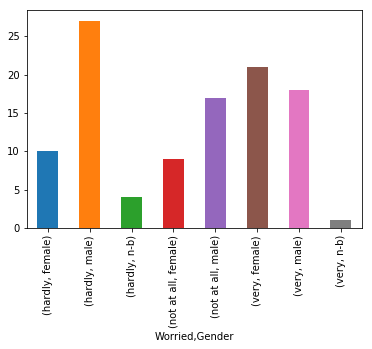

In [597]:
# Q7: plot of cross-reference assessment state of worry regarding political engagement on social media with gender (absolute frequency)
df.groupby(['Worried', 'Gender']).size().plot.bar()

# Question 8: Assessment change of attitudinal state after scandals

In [580]:
# Q8: Assessment change of attitude towards information on timeline state after scandals (absolute frequency)
pd.value_counts(df['Attitude change'])

more critical     76
none              27
less criticial     4
Name: Attitude change, dtype: int64

In [598]:
# Q8: Assessment change of attitude towards information on timeline state after scandals (relative frequency)
df['Attitude change'].value_counts(normalize=True)

more critical     0.710280
none              0.252336
less criticial    0.037383
Name: Attitude change, dtype: float64

In [584]:
# Q8: Cross-reference assessment change of attitude towards information on timeline after scandals with gender
df.groupby(['Attitude change', 'Gender']).size()

Attitude change  Gender
less criticial   female     3
                 male       1
more critical    female    31
                 male      42
                 n-b        3
none             female     6
                 male      19
                 n-b        2
dtype: int64

In [585]:
# Q8: Cross-reference assessment change of attitude towards information on timeline after scandals with gender
pd.crosstab(df['Attitude change'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

Gender             female      male       n-b
Attitude change                              
less criticial   0.750000  0.250000  0.000000
more critical    0.407895  0.552632  0.039474
none             0.222222  0.703704  0.074074

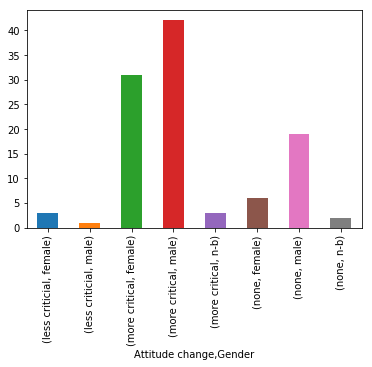

In [586]:
# Q8: plot of cross-reference change of attitude towards information on timeline after scandals with gender (absolute frequency)
df.groupby(['Attitude change', 'Gender']).size().plot.bar()

# Question 9: Assessment behavioural change as a result of online misinformation campaigns

In [587]:
# Q9: Assessment change of online behaviour as a result of misinformation campaigns (absolute frequency)
pd.value_counts(df['Behavioural change'])

use less            47
use differently     24
none                22
account deletion    14
Name: Behavioural change, dtype: int64

In [589]:
# Q9: Assessment change of online behaviour as a result of misinformation campaigns (relative frequency)
df['Behavioural change'].value_counts(normalize=True)

use less            0.439252
use differently     0.224299
none                0.205607
account deletion    0.130841
Name: Behavioural change, dtype: float64

In [588]:
# Q9: Cross-reference assessment change of online behaviour as a result of misinformation campaigns with gender
df.groupby(['Behavioural change', 'Gender']).size()

Behavioural change  Gender
account deletion    female     6
                    male       8
none                female     5
                    male      16
                    n-b        1
use differently     female     9
                    male      11
                    n-b        4
use less            female    20
                    male      27
dtype: int64

In [590]:
# Q8: Cross-reference assessment change of online behaviour as a result of misinformation campaigns with gender
pd.crosstab(df['Behavioural change'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

Gender                female      male       n-b
Behavioural change                              
account deletion    0.428571  0.571429  0.000000
none                0.227273  0.727273  0.045455
use differently     0.375000  0.458333  0.166667
use less            0.425532  0.574468  0.000000

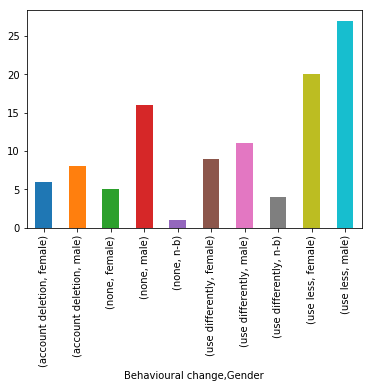

In [591]:
# Q8: plot of cross-reference assessment change of online behaviour as a result of misinformation campaigns with gender (absolute frequency)
df.groupby(['Behavioural change', 'Gender']).size().plot.bar()